In [116]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from numeric_tests import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


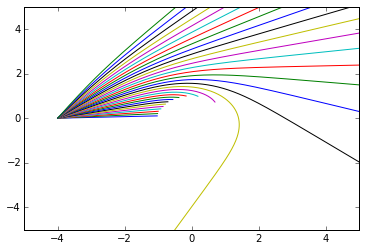

In [127]:
for ray in trace_rays(n_rays = 30):
    ray.angle = ray.rel*60

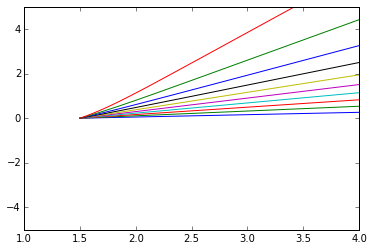

In [128]:
for ray in trace_rays(n_rays = 10, x0 = 1.5, plot_xlim=[1,4]):
    ray.angle = ray.rel*60

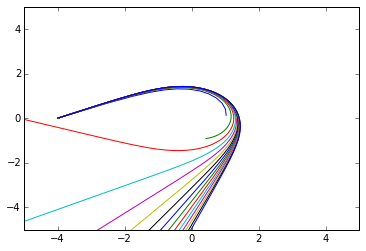

In [108]:
for ray in trace_rays(n_rays = 15, angle = 26):
    ray.n_steps = 50 * (1+ray.idx)

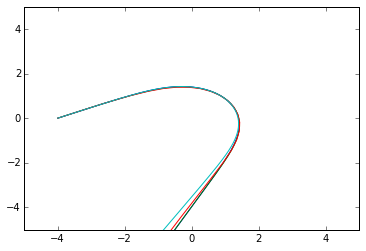

In [109]:
trace_ray(angle=26, n_steps=500)
trace_ray(angle=26.6, n_steps=100)
trace_ray(angle=27.4, n_steps=50)
trace_ray(angle=25.9, n_steps=1000);

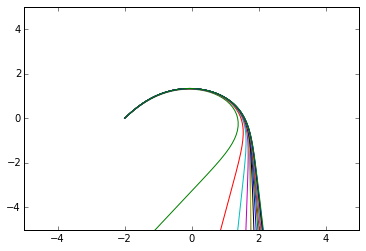

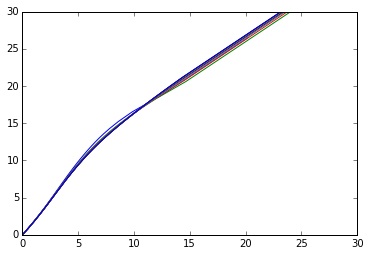

In [298]:
ray_params = { 'angle': 55, 'x0': -2 }
trace_ray(**ray_params)
for ray in trace_rays(n_rays = 15, **ray_params):
    ray.n_steps = 100 * (1+ray.idx)
plt.show()
for ray in trace_rays(n_rays = 15, **ray_params):
    ray.n_steps = 100 * (1+ray.idx)
    ray.plot_x = path_arc_length
    ray.plot_y = path_time
    ray.plot_xlim = [0,30]
    ray.plot_ylim = [0,30]
